In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
import os
files = os.listdir('artifacts')
files

['f=2000.csv',
 'f=400.csv',
 'f=50.csv',
 'f=5.csv',
 'f=4000.csv',
 'f=800.csv',
 'f=10.csv',
 'f=100.csv',
 'f=1000.csv',
 'no_GA.csv',
 'f=1.csv',
 'f=200.csv',
 'no_GA_raw.csv']

In [113]:
# Function to extract the numeric value from the filename
def extract_value(filename):
    if 'f=' in filename:
        return int(filename.split('=')[1].split('.')[0])  # Extract the number before .csv
    return float('inf')  # Assign a high value to non-f= files for sorting purposes

# Sort the list based on extracted values
sorted_files = sorted(files, key=extract_value)

# Display the sorted list
for file in sorted_files:
    print('\t->', file)

	-> f=1.csv
	-> f=5.csv
	-> f=10.csv
	-> f=50.csv
	-> f=100.csv
	-> f=200.csv
	-> f=400.csv
	-> f=800.csv
	-> f=1000.csv
	-> f=2000.csv
	-> f=4000.csv
	-> no_GA.csv
	-> no_GA_raw.csv


In [114]:
df = pd.read_csv('artifacts/f=1000.csv')
df.drop(columns=['Wall time'], inplace=True)
df.head()

,Step,Value
0,4,0.096875
1,18,0.098684
2,39,0.101758
3,46,0.102892
4,61,0.105469


In [115]:
paths = {
    'No GA' : 'artifacts/no_GA.csv',
    # 'q=1' : 'artifacts/f=1.csv',
    'q=10' : 'artifacts/f=10.csv',
    # 'q=50' : 'artifacts/f=50.csv',
    # 'q=100' : 'artifacts/f=100.csv',
    'q=200' : 'artifacts/f=200.csv',
    'q=400' : 'artifacts/f=400.csv',
    # 'q=800' : 'artifacts/f=800.csv',
    
    'q=1000' : 'artifacts/f=1000.csv',
    'q=2000' : 'artifacts/f=2000.csv',
}

In [116]:
dfs = {}
for key, path in paths.items():
    dfs[key] = pd.read_csv(path, usecols=['Step', 'Value'])
    dfs[key].columns = ['Round', 'Accuracy']
    
dfs['q=10']

,Round,Accuracy
0,3,0.074219
1,11,0.091797
2,20,0.094866
3,44,0.105208
4,53,0.106481
...,...,...
995,9939,0.100502
996,9964,0.100568
997,9990,0.100744
998,9994,0.100841


In [117]:
# dfs = {
#     'No GA' : pd.read_csv('artifacts/no_GA.csv'),
#     # 'q=1' : pd.read_csv('artifacts/f=1.csv', usecols=['Step', 'Value']),
#     # 'q=5' : pd.read_csv('artifacts/f=5.csv', usecols=['Step', 'Value']),
#     'q=10' : pd.read_csv('artifacts/f=10.csv', usecols=['Step', 'Value']),
#     'q=100' : pd.read_csv('artifacts/f=10.csv', usecols=['Step', 'Value']),
    
#     'q=1000' : pd.read_csv('artifacts/f=1000.csv', usecols=['Step', 'Value']),
#     'q=2000' : pd.read_csv('artifacts/f=2000.csv', usecols=['Step', 'Value']),
# }

In [118]:
# for key in dfs.keys():
#     dfs[key].columns = ['Round', 'Accuracy']
    
# dfs[key].tail()

In [119]:
df = pd.DataFrame(dfs['No GA']['Round'])
for x in dfs.keys():
    col = str(x)
    df[col] = dfs[x]['Accuracy']
df.head()

,Round,No GA,q=10,q=200,q=400,q=1000,q=2000
0,0,10.00,0.074219,0.082813,0.081250,0.096875,0.085938
1,10,10.00,0.091797,0.092928,0.100329,0.098684,0.094984
2,16,10.00,0.094866,0.102930,0.104297,0.101758,0.096608
3,34,10.00,0.105208,0.102892,0.103723,0.102892,0.097331
4,36,11.13,0.106481,0.103705,0.103201,0.105469,0.098693


In [120]:
cols_to_multiply = df.columns.difference(['Round', 'No GA'])  # Exclude 'Round' and 'No GA'
df[cols_to_multiply] = df[cols_to_multiply] * 100
df.head()

,Round,No GA,q=10,q=200,q=400,q=1000,q=2000
0,0,10.00,7.421875,8.281250,8.125000,9.687500,8.593750
1,10,10.00,9.179688,9.292763,10.032894,9.868421,9.498356
2,16,10.00,9.486607,10.292969,10.429688,10.175781,9.660823
3,34,10.00,10.520833,10.289229,10.372341,10.289229,9.733073
4,36,11.13,10.648149,10.370464,10.320061,10.546875,9.869260


In [121]:
df_melted = df.melt(id_vars='Round', var_name='Method', value_name='Value')
df_melted.head()

,Round,Method,Value
0,0,No GA,10.00
1,10,No GA,10.00
2,16,No GA,10.00
3,34,No GA,10.00
4,36,No GA,11.13


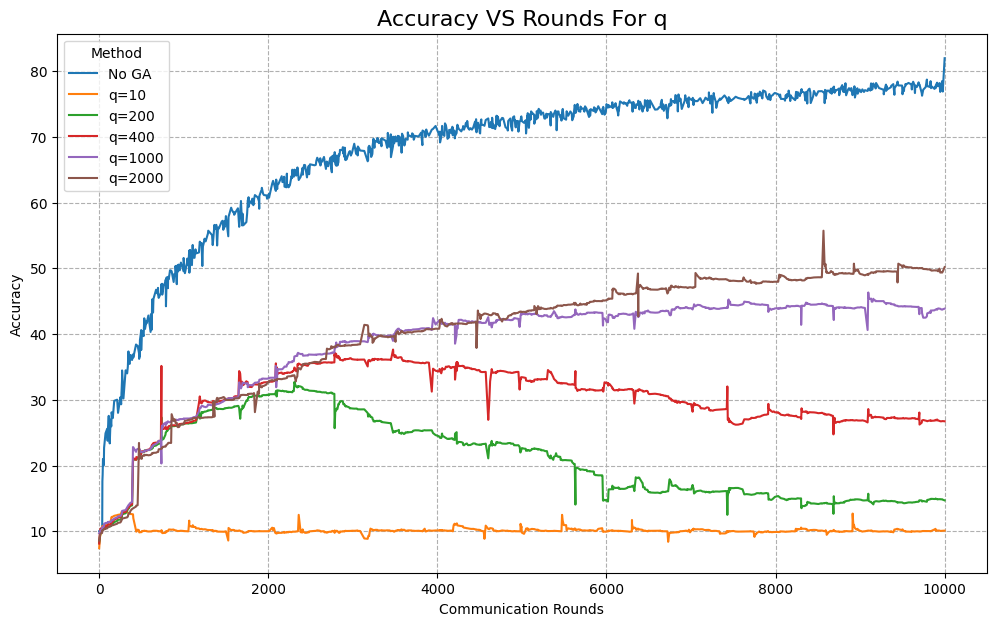

In [122]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, 
             x='Round', 
             y='Value', 
             hue='Method', 
            #  marker='o'
             )

plt.title('Accuracy VS Rounds For q', fontsize=16)
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--')

plt.show()

### Smoother plot

In [149]:
window_size = 25
df_smoothed = df.copy()

# Apply rolling mean for each column (ignoring 'Round')
for col in df.columns[2:]:
    df_smoothed[col] = df[col].rolling(window=window_size).mean()
    
df_smoothed = df_smoothed.fillna(10)
df_smoothed.head()

,Round,No GA,q=10,q=200,q=400,q=1000,q=2000
0,0,10.00,10.0,10.0,10.0,10.0,10.0
1,10,10.00,10.0,10.0,10.0,10.0,10.0
2,16,10.00,10.0,10.0,10.0,10.0,10.0
3,34,10.00,10.0,10.0,10.0,10.0,10.0
4,36,11.13,10.0,10.0,10.0,10.0,10.0


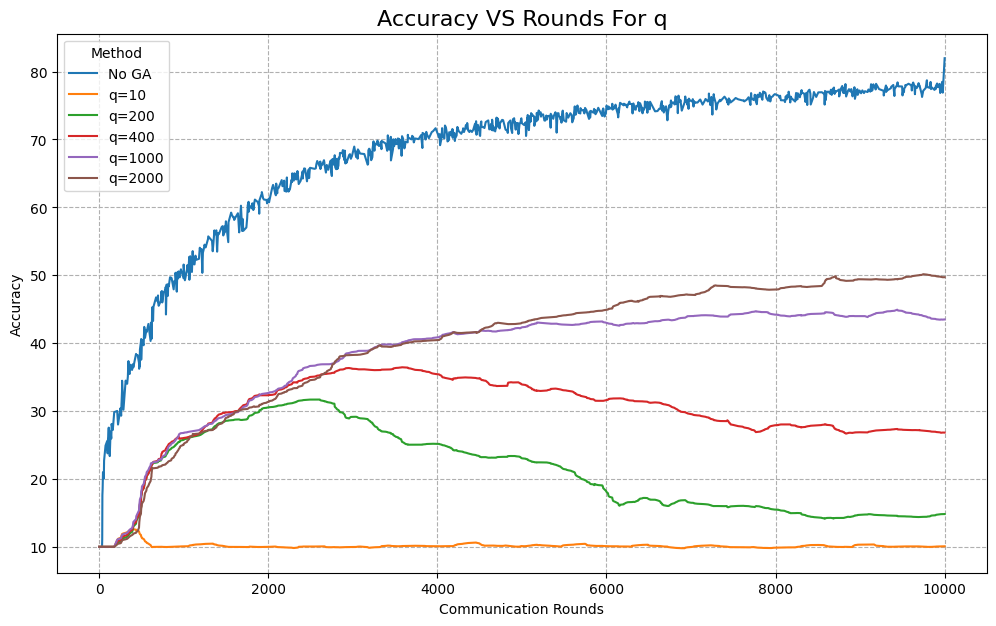

In [150]:
df_melted2 = df_smoothed.melt(id_vars='Round', var_name='Method', value_name='Value')

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted2, 
             x='Round', 
             y='Value', 
             hue='Method', 
            #  marker='o'
             )

plt.title('Accuracy VS Rounds For q', fontsize=16)
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--')

plt.show()

In [152]:
os.chdir('..')
from models import cnn

models.cnn.CNN_Cifar10_2

In [159]:
model = cnn.CNN_Cifar10_2()
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params

541094

/tmp/ipykernel_3984556/3760551268.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='setting', y='Total Params', data=df, palette='viridis')


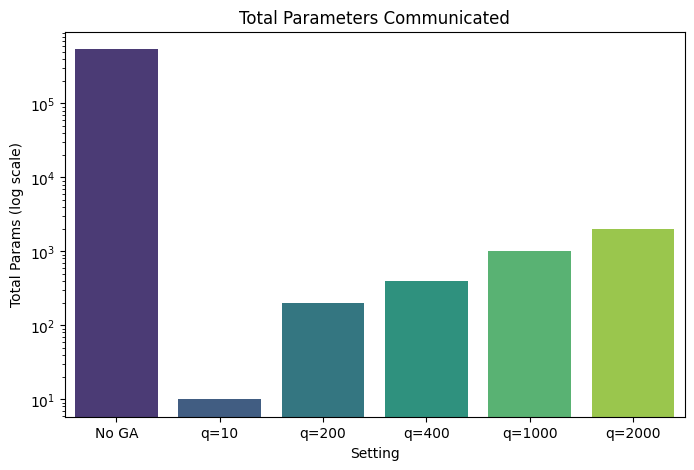

In [160]:
# Data preparation
data = {
    'setting': ['No GA', 'q=10', 'q=200', 'q=400', 'q=1000', 'q=2000'],
    'Total Params': [total_params, 10, 200, 400, 1000, 2000]
}

df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='setting', y='Total Params', data=df, palette='viridis')

# Set plot title and labels
plt.title('Total Parameters Communicated')
plt.xlabel('Setting')
plt.ylabel('Total Params (log scale)')

# Set y-axis to logarithmic scale
plt.yscale('log')